# K-Means Clustering

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500, centers = 5)
print(X.shape,y.shape)

(500, 2) (500,)


/home/rishi/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


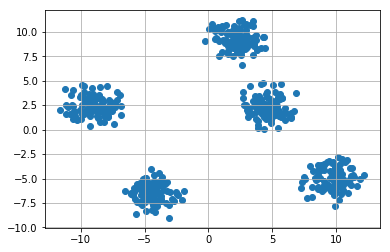

In [3]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
k = 5

colors = ['green','red','blue','yellow','orange','pink']

clusters = {}

for kx in range(k):
    centre = 10.0*(2*np.random.random((X.shape[1],)) -1)
    points = []
    cluster = {
        
        'centre' : centre,
        'points' : points,
        'color' : colors[kx]
    }
    clusters[kx] = cluster
    
print(clusters)

{0: {'color': 'green', 'points': [], 'centre': array([6.87057658, 8.99073212])}, 1: {'color': 'red', 'points': [], 'centre': array([-9.93894819,  3.51128911])}, 2: {'color': 'blue', 'points': [], 'centre': array([3.52246595, 0.67961642])}, 3: {'color': 'yellow', 'points': [], 'centre': array([ 5.455395  , -7.36673106])}, 4: {'color': 'orange', 'points': [], 'centre': array([-0.88579585,  6.84993492])}}


In [5]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

/home/rishi/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


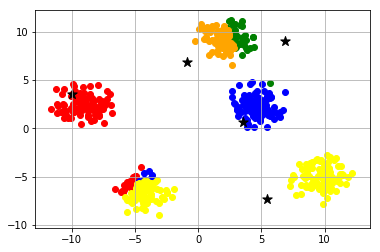

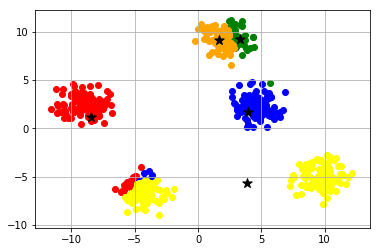

In [6]:
for ix in range(X.shape[0]):
    dist = []
    curr_x = X[ix]
    
    for kx in range(k):
        d = distance(curr_x, clusters[kx]['centre'])
        dist.append(d)
    
    current_cluster = np.argmin(dist)
    
    clusters[current_cluster]['points'].append(curr_x)
    
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    
    clusters[kx]['coords'] = pts
    
plt.figure(0)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['centre']
    plt.scatter(center[0],center[1], color='black',s=100,marker="*")

for kx in range(k):
    if clusters[kx]['coords'].shape[0] > 0:
        new_center = clusters[kx]['coords'].mean(axis=0)
    else:
        new_center = clusters[kx]['centre']
    
    clusters[kx]['centre'] = new_center
    clusters[kx]['points'] = []
    
plt.figure(1)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['centre']
    plt.scatter(center[0],center[1], color='black',s=100,marker="*")